In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 688 kB/s 


In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv(r'/content/gdrive/My Drive/drugEffects.csv')
df.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,condition,sideEffects
0,0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects
1,1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects
2,2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects
3,3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects
4,4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects


In [ ]:
df.shape

(3107, 6)

In [ ]:
df.columns

Index(['Unnamed: 0', 'urlDrugName', 'rating', 'effectiveness', 'condition',
       'sideEffects'],
      dtype='object')

In [ ]:
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df.head()

,urlDrugName,rating,effectiveness,condition,sideEffects
0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects
1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects
2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects
3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects
4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects


In [ ]:
df['urlDrugName'].nunique()

502

In [ ]:
df['rating'].unique()

array([ 4,  1, 10,  3,  2,  9,  7,  8,  6,  5])

In [ ]:
df['effectiveness'].unique()

array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [ ]:
df['condition'].nunique()

1426

In [ ]:
df['sideEffects'].unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

In [ ]:
df.isnull().sum()

urlDrugName      0
rating           0
effectiveness    0
condition        1
sideEffects      0
dtype: int64

In [ ]:
df = df.dropna()

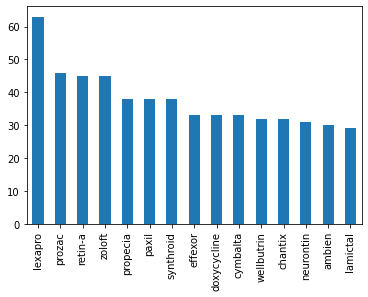

In [ ]:
df['urlDrugName'].value_counts().head(15).plot(kind='bar')
plt.rcParams['figure.figsize']=(10,7)
plt.show()

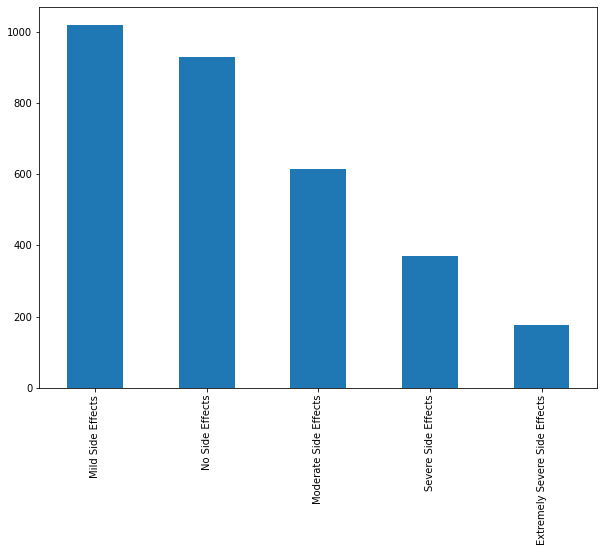

In [ ]:
df['sideEffects'].value_counts().head(10).plot(kind='bar')
plt.rcParams['figure.figsize']=(10,7)
plt.show()

In [ ]:
cols = ['urlDrugName', 'condition', 'effectiveness']

In [ ]:
X = df.drop('sideEffects',axis=1)
y=df['sideEffects']

In [ ]:
#different types of encoding
encoder = ce.BinaryEncoder(cols=cols)
encoder.fit(X,y)
X_cleaned = encoder.transform(X)

In [ ]:
X_cleaned.head()

,urlDrugName_0,urlDrugName_1,urlDrugName_2,urlDrugName_3,urlDrugName_4,urlDrugName_5,urlDrugName_6,urlDrugName_7,urlDrugName_8,rating,...,condition_1,condition_2,condition_3,condition_4,condition_5,condition_6,condition_7,condition_8,condition_9,condition_10
0,0,0,0,0,0,0,0,0,1,4,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,1,10,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,1,0,0,3,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,1,2,...,0,0,0,0,0,0,0,1,0,1


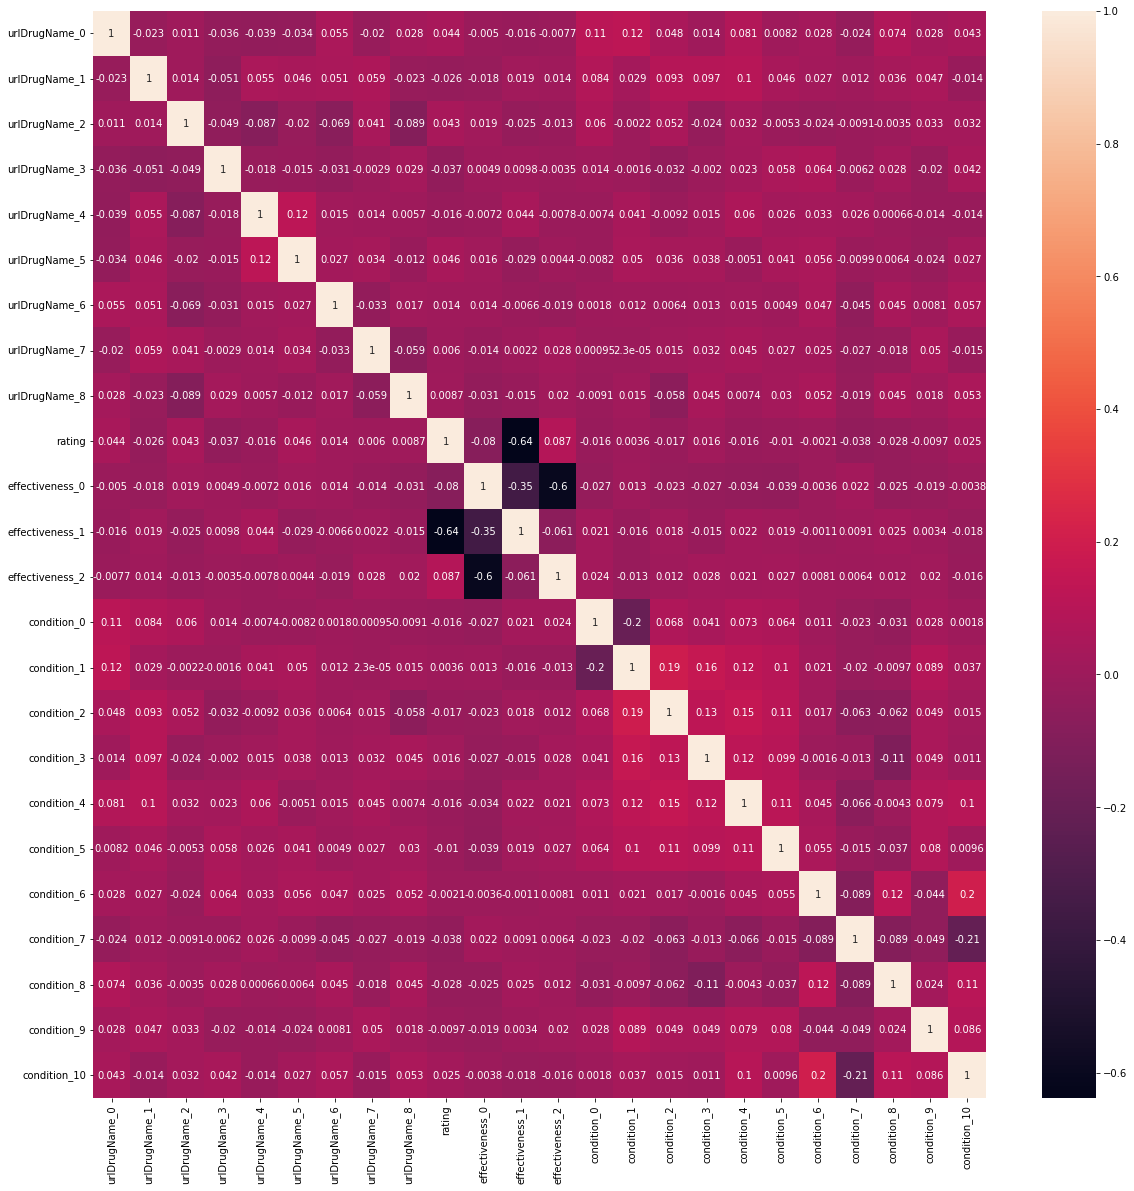

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(X_cleaned.corr(),annot=True)

In [ ]:
#proper way to split the data for effective results

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test ,y_train, y_test = train_test_split(X_cleaned, y, test_size=0.33, stratify=y)


(2081, 27) (1025, 27) (2081,) (1025,)


In [ ]:
#making a pipe to run all possible models starting from vanilla models


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
print(classification_report(y_pred, y_test))

                               precision    recall  f1-score   support

Extremely Severe Side Effects       0.31      0.27      0.29        67
            Mild Side Effects       0.50      0.43      0.46       384
        Moderate Side Effects       0.30      0.35      0.32       175
              No Side Effects       0.49      0.50      0.50       298
          Severe Side Effects       0.30      0.37      0.33       101

                     accuracy                           0.42      1025
                    macro avg       0.38      0.38      0.38      1025
                 weighted avg       0.43      0.42      0.42      1025



In [ ]:
from sklearn.svm import SVC
svc = SVC(class_weight='balanced')


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001, 0.01, 0.1, 0.5, 1]}
gm = GridSearchCV(svc,param_grid=param_grid)

In [ ]:
gm.fit(X_train, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto'

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight='balanced',
                           coef0=0.0, decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
gm.best_params_

{'C': 0.5}

In [ ]:
gm_ypred = gm.predict(X_test)

In [ ]:
print(classification_report(y_test, gm_ypred))

                               precision    recall  f1-score   support

Extremely Severe Side Effects       0.37      0.88      0.52        58
            Mild Side Effects       0.48      0.45      0.46       336
        Moderate Side Effects       0.36      0.34      0.35       203
              No Side Effects       0.58      0.54      0.56       306
          Severe Side Effects       0.37      0.28      0.32       122

                     accuracy                           0.46      1025
                    macro avg       0.43      0.50      0.44      1025
                 weighted avg       0.47      0.46      0.46      1025



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
knn_ypred = knn.predict(X_test)

In [ ]:
print(classification_report(knn_ypred, y_test))

                               precision    recall  f1-score   support

Extremely Severe Side Effects       0.48      0.29      0.36        96
            Mild Side Effects       0.51      0.42      0.46       414
        Moderate Side Effects       0.27      0.32      0.29       173
              No Side Effects       0.46      0.55      0.50       256
          Severe Side Effects       0.25      0.36      0.30        86

                     accuracy                           0.42      1025
                    macro avg       0.40      0.39      0.38      1025
                 weighted avg       0.43      0.42      0.42      1025

